# Pandas Basics - DataFrame Titanic example

[_Pandas_][1] Python package to handle tabels

[1]: http://pandas.pydata.org/ "pandas org"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pd.set_option('notebook_repr_html', True)

## The DataFrame class
The main data structure of pandas. A table like structure that contains the data. DataFrame has a lot of functionality, IO operations, statistical operations, plotting with the help of matplotlib and numerical operations with the help of numpy package.
Documentation:
* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame 
* http://pandas.pydata.org/pandas-docs/stable/api.html#dataframe

# Dataframe basic functionality
* Each column of the Dataframe, the table, can be of  single type.
* a series object containing one column, `df['col_3']` is a Series.
* a row is a series where the colmn names are the index of the series
### Basic functionality
* Access data

    * `df.loc[100] # row with index 100` - access data in row by the index
    * `df.iloc[100] # row number 100` -  access data in row by location   
    * `df['col_3'].index` - returns Index instance of series index
    * `df['col_3'].values` -  returns Array of the values in the column (Series)
* ### Viewing Medods
    * df.head, df.tail() - view few rows from start or end.
    * df.describe(), df.info() - aggregation and statistics 
    * df.value_counts() - return series of uniue values and teir frequency
    * df.unique(),df.nunique() - numpy functions appplied to the data in the column
* ### Manipulation Medods
    * df.replace({'Male':1, 'Female':0}) - Replace values values in column according dictionary
    * df.apply(my_func) - apply the function my_func on every cell in the column, returns a series of results
* ### Manage columns with str 
    * when the series type is str, we can use str methods , by adding .str:
        * s.str.len()
        * s.str.str.replace('Sheba', 'Sheva')
        * s.str.contains('mu')
* ### Plot
    * df[col_1].plot(kind = 'hist') - ploting the data in the column

## DataFrame Creation
DataFrame can basicly created from any data that has tabular format. arrays, lists, dictionaries etc.

The most common way is to create dataframe from csv file.

### Creation from file
Pandas support many file formats. Most common are csv and excel files. For this example, we use Titanic data set, from csv file, downloaded from kaggle. 
* https://www.kaggle.com

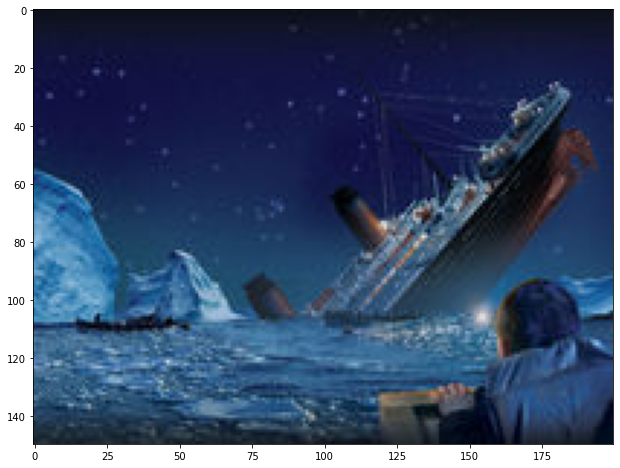

In [3]:
fig1 = plt.figure(figsize = (15,8)) 
img=plt.imread('Titanic_sinking.jpg')
plt.figsize=(20,4)
imgplot = plt.imshow(img)
plt.show()

### read_csv() / read_excel() functions
CSV is a text file that contains tabular data, as excel.
* Each line, contains one row, 
* values are separated with delimiter, as:  `,`, a space etc.

read_csv() has many options, as:
* seting the column types
* selecting specific columns or row to read, etc.

To view the data,lets read the first 5 rows.

In [4]:
pd.read_csv('titanic.csv',nrows=5).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Load Titanic csv file
Features are:
* PassengerId
* survived: Survival (0 = no; 1 = yes)
* pclass: Passenger class (1 = first; 2 = second; 3 = third)
* name: Name
* sex: Sex
* age: Age
* SibSp: Number of siblings/spouses aboard
* Parch: Number of parents/children aboard
* ticket: Ticket number
* fare: Passenger fare
* cabin: Cabin
* embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [6]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Columns - Manage and Manipulate

In [7]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


## Columns Add, Create and Delete
Columns are Series pandas data structure, that contain one dimensional array like of data from the same type.
* Select column by name : `df['col_name']`
* Create and add column: `df['new_column_name'] = val or list/series of vals`

In [314]:
# Creating new feature
df['familys']=df['SibSp']+df['Parch']
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familys
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


# $$ Who \;has\; the\;best\; chance\; to\; survive\; ?$$
## $ What\; is\; the\;surviving\; probability\;?$
### Data selection 
Rows can be selected from DataFrame by indexing and slicing, or by some boolean condition on columns values.
* Row  selection by condition on column
> df_selected = df[some condition on df[col]]

Example: `df_alone = df[df['familys'] == 0]`

* Row  selection by multiple condition on columns. It can be few conditions on the same columns, or conditions on different columns. Logic symbols should be used.
> df_selected = df[(some condition on df[col]) &|~ (some condition on df[col])]

Examples:<br>
* `df_alone = df[(df['SibSp'] == 0) & (df['Parch']==0)]`
* `df_teens = df[(df['Age'] > 16) & (df['Age'] < 19)]`

Define a Dataframe of the survivors. Like in numpy, df_survivors is a "view" of the original DataFrame, not a copy. If you need a copy, use `df.copy()`.

In [315]:
df_survivers = df[df['Survived']==1]
df_survivers.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familys
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1


In [316]:
n_survivers = np.sum(df['Survived']==1)
n_passangers = len(df)

print ('n pasangers: ', n_passangers, ' and n survivers: ', n_survivers)
print ('chance to survive: ', n_survivers * 1.  / n_passangers)


n pasangers:  891  and n survivers:  342
chance to survive:  0.3838383838383838


## Replace values in DataFrame
You can replace values in many ways. map(), replace() uses dictionaries, to replace values. Values are replaces to clean data and make it numeric for machine learning calculation.

In [317]:
df['Sex'] = df['Sex'].map( {'female': 'women', 'male': 'man'} )
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familys
0,1,0,3,"Braund, Mr. Owen Harris",man,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",women,38.0,1,0,PC 17599,71.2833,C85,C,1


### Delete column from data frame

The function **drop()** delete the specified part from df. axis=1, marks drop functions,to delete those values from all the rows.

In [318]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'familys'],
      dtype='object')


In [319]:
df = df.drop(['PassengerId', 'SibSp', 'Parch', 'Cabin'], axis=1)
df.head(2)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familys
0,0,3,"Braund, Mr. Owen Harris",man,22.0,A/5 21171,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",women,38.0,PC 17599,71.2833,C,1


## $ Is\; name\; mater\; ? $
View few names

In [320]:
df.Name.head(8)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
Name: Name, dtype: object

### Replace column values by list
In any Name field, there is a title, lets extract the titles from the Names and create a title list.<br>
Following are the extraction steps:

In [321]:
for i in df.Name[0:5]:
    print(i.split(","))

['Braund', ' Mr. Owen Harris']
['Cumings', ' Mrs. John Bradley (Florence Briggs Thayer)']
['Heikkinen', ' Miss. Laina']
['Futrelle', ' Mrs. Jacques Heath (Lily May Peel)']
['Allen', ' Mr. William Henry']


Choose the correct element of the split: 
    * i.split(",")[1]

In [322]:
for i in df.Name[0:5]:
    print(i.split(",")[1])

 Mr. Owen Harris
 Mrs. John Bradley (Florence Briggs Thayer)
 Miss. Laina
 Mrs. Jacques Heath (Lily May Peel)
 Mr. William Henry


In [323]:
for i in df.Name[0:5]:
    print(i.split(",")[1].split("."))

[' Mr', ' Owen Harris']
[' Mrs', ' John Bradley (Florence Briggs Thayer)']
[' Miss', ' Laina']
[' Mrs', ' Jacques Heath (Lily May Peel)']
[' Mr', ' William Henry']


After another split, choos the title, and strip spaces and tabs:
    * i.split(",")[1].split(".")[0].strip()

In [324]:
df['Name'] = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]

In [325]:
df.Name.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

Plot with pandas plot function.

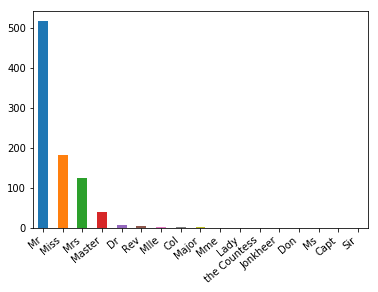

In [326]:
ax=df['Name'].value_counts().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

Or Plot with seaborn package function,which are based on matplotlib,but has more build in functions.

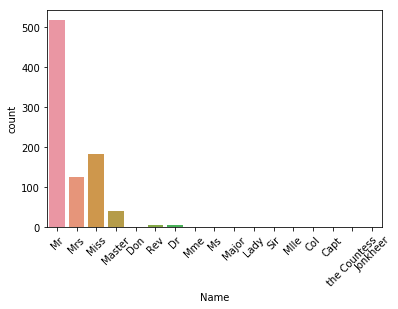

In [327]:
import seaborn as sns
g = sns.countplot(x="Name",data=df)
g = plt.setp(g.get_xticklabels(), rotation=45) 

### Apply function on DataFrame
By default, the argument function is applied on **column**.<br>
If chained with df, the function will be applied column by column.
apply() function Used for:
* aggregation, statistics.
* Correct and clean column values.
* Create new features/columns.

Lets map Name values to number

In [328]:
def Name_to_int(x):
        
    if (x in ['Mr',  'Don']): return 0
    
    if (x in ['Mrs', 'Lady', 'Mme']): return 1
    
    if (x in ['Miss', 'Ms', 'Mlle']): return 2
    
    if (x in ['Master']): return 3
    
    if (x in ['Dr', 'Major', 'Col', 'Capt', 'Rev']): return 4
    
    return 5

df['Name'] = df.Name.apply(Name_to_int)
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familys
0,0,3,0,man,22.0,A/5 21171,7.2500,S,1
1,1,1,1,women,38.0,PC 17599,71.2833,C,1
2,1,3,2,women,26.0,STON/O2. 3101282,7.9250,S,0
3,1,1,1,women,35.0,113803,53.1000,S,1
4,0,3,0,man,35.0,373450,8.0500,S,0


## Visualize correlations
## pandas crosstab function
<font size=4>pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)<br>

> Compute a simple cross-tabulation of two (or more) factors. 

> By default computes a frequency table of the factors, unless an array of values and an aggregation function are passed.

Part of the parameters:
* margins : boolean, default False Add row/column margins (subtotals)
* normalize : boolean, {‘all’, ‘index’, ‘columns’}, or {0,1}, default False Normalize by dividing all values by the sum of values.
    * If passed ‘all’ or True, will normalize over all values.
    * If passed ‘index’ will normalize over each row.
    * If passed ‘columns’ will normalize over each column.
    * If margins is True, will also normalize margin values.
    
Returns:	
* crosstab : DataFrame

Moreabout crosstab:
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
*  http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html

In [329]:
name_surv = pd.crosstab(df['Name'], df['Survived'])
print(type(name_surv))
name_surv.head()

<class 'pandas.core.frame.DataFrame'>


Survived,0,1
Name,,
0,437,81
1,26,101
2,55,130
3,17,23
4,13,5


By default The first is the index and the second is the column

In [330]:
name_surv = pd.crosstab(index=df['Survived'], columns=df['Name'],
                      margins=False)
print(type(name_surv))
name_surv.head()


<class 'pandas.core.frame.DataFrame'>


Name,0,1,2,3,4,5
Survived,,,,,,
0,437,26,55,17,13,1
1,81,101,130,23,5,2


### with margins

In [331]:
name_surv = pd.crosstab(index=df['Survived'], columns=df['Name'],
                      margins=True)
print(type(name_surv))
name_surv.head()


<class 'pandas.core.frame.DataFrame'>


Name,0,1,2,3,4,5,All
Survived,,,,,,,
0,437,26,55,17,13,1,549
1,81,101,130,23,5,2,342
All,518,127,185,40,18,3,891


In [332]:
### with Normalization

In [333]:
name_surv = pd.crosstab(index=df['Survived'], columns=df['Name'],
                      margins=True, normalize ='columns')
print(type(name_surv))
name_surv.head()


<class 'pandas.core.frame.DataFrame'>


Name,0,1,2,3,4,5,All
Survived,,,,,,,
0,0.843629,0.204724,0.297297,0.425,0.722222,0.333333,0.616162
1,0.156371,0.795276,0.702703,0.575,0.277778,0.666667,0.383838


In [334]:

name_surv = pd.crosstab(df['Name'], df['Survived'],
                          normalize='index')


Text(0, 0.5, 'Survival Rate')

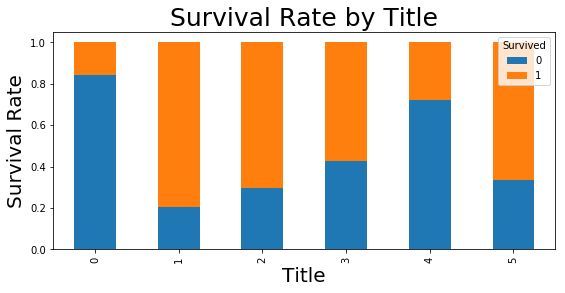

In [335]:
name_surv.plot(kind='bar', 
                  stacked=True, 
                  fontsize=10, figsize=(9,4))
plt.title('Survival Rate by Title', fontsize=25)
plt.xlabel('Title',fontsize=20)
plt.ylabel('Survival Rate', fontsize=20)

# Class exercise
* change Sex column to int
* visualize correlation: Sex with survive
* #### $ Is\; Family\; a\; good \;thing ? $
    * Visualize family size correlation with survive

# Class exercise - Solution

In [336]:
df['Sex'] = df['Sex'].map( {'man': 0, 'women': 1} ).astype(int)
df.head(2)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familys
0,0,3,0,0,22.0,A/5 21171,7.2500,S,1
1,1,1,1,1,38.0,PC 17599,71.2833,C,1


In [337]:
sex_ct = pd.crosstab(index=df['Survived'], columns=df['Sex'],
                      normalize=True)
sex_ct.head()

Sex,0,1
Survived,,
0,0.525253,0.090909
1,0.122334,0.261504


Text(0, 0.5, 'Survival Rate')

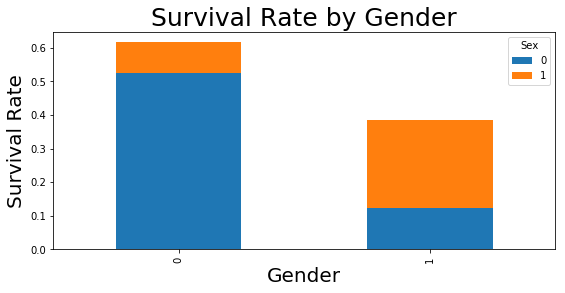

In [338]:
sex_ct.plot(kind='bar', 
                  stacked=True, 
                  fontsize=10, figsize=(9,4))
plt.title('Survival Rate by Gender', fontsize=25)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Survival Rate', fontsize=20)

## $ Is\; Family\; a\; good \;thing ? $

Text(0, 0.5, 'Survival Rate')

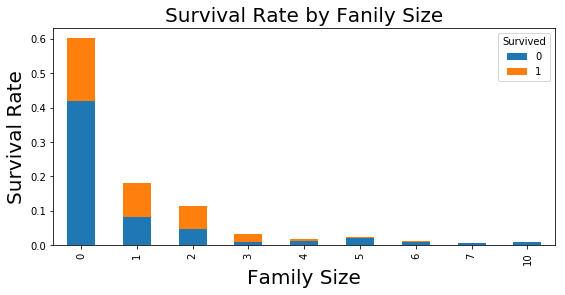

In [339]:
title_xt = pd.crosstab(df['familys'], df['Survived'], normalize=True)

title_xt.plot(kind='bar', 
                  stacked=True, 
                   figsize=(9,4))
plt.title('Survival Rate by Fanily Size', fontsize=20)
plt.xlabel('Family Size', fontsize=20)
plt.ylabel('Survival Rate', fontsize=20)

Text(0, 0.5, 'Survival Rate')

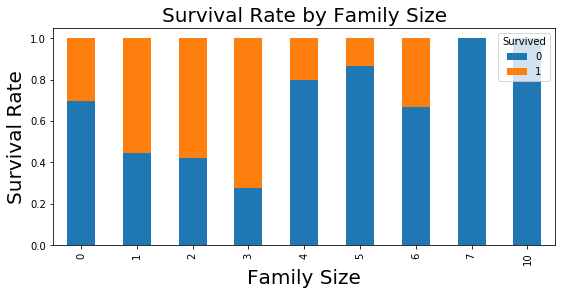

In [340]:
title_xt = pd.crosstab(df['familys'], df['Survived'], normalize='index')

title_xt.plot(kind='bar', 
                  stacked=True, 
                   figsize=(9,4))
plt.title('Survival Rate by Family Size', fontsize=20)
plt.xlabel('Family Size', fontsize=20)
plt.ylabel('Survival Rate', fontsize=20)

# Manage Missing values
* fillna(x) - Fills missing values by x
There are many options, the right choice depends on data and goals.
* Replace with 0
* Replace with mean/median
* Replace with sampling from some distribution
* Delete the lines with missing values

In [341]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
Ticket        0
Fare          0
Embarked      2
familys       0
dtype: int64

> we see that Age and Embarked have null values, Lets correct it.

### Embarked  feature
Lets check its values

In [342]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [343]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<font size=4>
Only 2 values are missing, we can: 
    
    * delete them, or 
    
    * fill the value with 'S', which is the most common value.<br>
    
* Fill missing values with:`df['Embarked'] = df['Embarked'].fillna('S')`
<br><br>
* Select rows by condition:
    * `df[df['Embarked'].isnull()]`
<br> <br>   
* Select cells by condition:
    * `df.loc[df['Embarked'].isnull(),'Embarked']`

In [344]:
df[df['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familys
61,1,1,2,1,38.0,113572,80.0,NaN,0
829,1,1,1,1,62.0,113572,80.0,NaN,0


In [345]:
df.loc[df['Embarked'].isnull(),'Embarked'] = 'S'

In [346]:
# Mapping Embarked
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

Text(0, 0.5, 'Survival Rate')

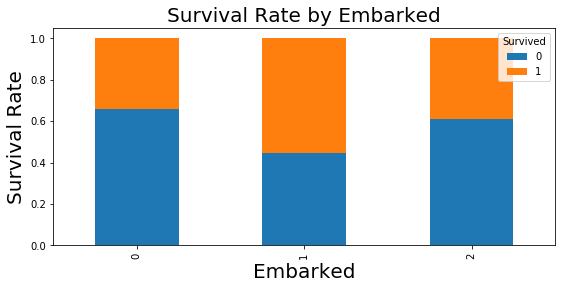

In [347]:
Embarked_surv = pd.crosstab(df['Embarked'], df['Survived'], normalize='index')

Embarked_surv.plot(kind='bar', 
                  stacked=True, 
                   figsize=(9,4))
plt.title('Survival Rate by Embarked', fontsize=20)
plt.xlabel('Embarked', fontsize=20)
plt.ylabel('Survival Rate', fontsize=20)

## Class exercise manage Null values of Age

* calculate mean and std of age
* select all rows with null age, how many ?
* Fill null age values with random number between , mean-std to mean+std
* Plot histogram of age with 60 bins
* Create 2 dataframe's one for survivors, and one not. plot on one plot 2 histograms, one for survivors in blue, and the non survivors in red.
* create new column age_range that map age to ranges of: 0-16,16-32,32-48,48-64,>64
* drow hist of your new column
* delete your new column

## Class exercise manage Null values of Age - solution

In [348]:
age_avg = df['Age'].mean()
print(age_avg)
age_std = df['Age'].std()
print(age_std)
age_null_count = df['Age'].isnull().sum()
print(age_null_count)

29.69911764705882
14.526497332334044
177


In [349]:
age_null_random_list = np.random.randint(age_avg - age_std,
                                         age_avg + age_std,
                                         size=age_null_count)

df.loc[df['Age'].isnull(),'Age'] = age_null_random_list
df['Age'] = df['Age'].astype(int)

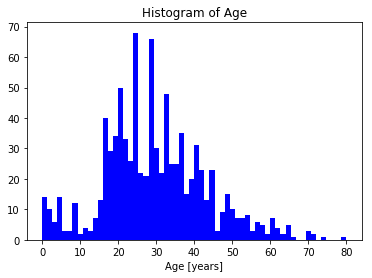

In [350]:
fig = plt.figure()
ax = fig.gca()
ax.hist(df['Age'], bins=60, color='blue')
ax.set_title('Histogram of Age')
ax.set_xlabel('Age [years]')
# ax.set_xlim([40, 100])
plt.show()

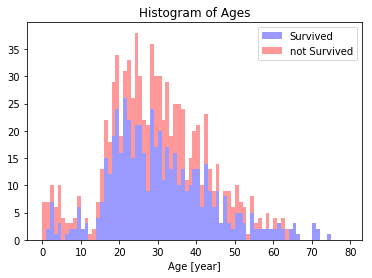

In [351]:
fig = plt.figure()
ax = fig.gca()
bins = np.arange(0,80)
df_died = df[df['Survived']==0]
df_live = df[df['Survived']==1]
ax.hist([df_died['Age'], df_live['Age']],
        bins=bins, color=['blue', 'red'], 
         stacked=True, alpha=0.4)
ax.set_title('Histogram of Ages')
ax.set_xlabel('Age [year]')
plt.legend(['Survived', 'not Survived'], loc='best')
plt.show()

In [352]:
    # Mapping Age
    df['age_range']=0
    df.loc[ df['Age'] <= 16, 'age_range']  = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'age_range'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'age_range'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'age_range'] = 3
    df.loc[ df['Age'] > 64, 'age_range'] = 4 ;
    df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familys,age_range
0,0,3,0,0,22,A/5 21171,7.2500,0,1,1
1,1,1,1,1,38,PC 17599,71.2833,1,1,2
2,1,3,2,1,26,STON/O2. 3101282,7.9250,0,0,1
3,1,1,1,1,35,113803,53.1000,0,1,2
4,0,3,0,0,35,373450,8.0500,0,0,2


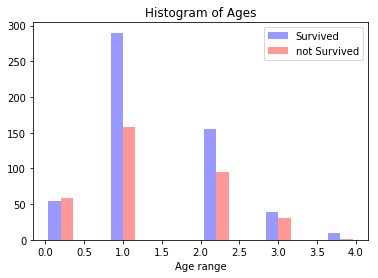

In [353]:
fig = plt.figure()
ax = fig.gca()

df_died = df[df['Survived']==0]
df_live = df[df['Survived']==1]
ax.hist([df_died['age_range'], df_live['age_range']],
        color=['blue', 'red'], 
         alpha=0.4)
ax.set_title('Histogram of Ages')
ax.set_xlabel('Age range')
plt.legend(['Survived', 'not Survived'], loc='best')

plt.show()

In [354]:
df = df.drop(['age_range'], axis=1)
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare',
       'Embarked', 'familys'],
      dtype='object')

# More about Correlations
<font size="5"> correlation coefficient is a measure of the strength of the linear relationship between two variables.</font>
    
<font size="3">
The Pearson product-moment correlation coefficient is a measure of the strength of the linear relationship between two variables. It is referred to as Pearson's correlation or simply as the correlation coefficient. If the relationship between the variables is not linear, then the correlation coefficient does not adequately represent the strength of the relationship between the variables.

Pearson's r can range from -1 to 1. An r of -1 indicates a perfect negative linear relationship between variables, an r of 0 indicates no linear relationship between variables, and an r of 1 indicates a perfect positive linear relationship between variables.</font>

## Correlations examples

In [466]:
dfn =pd.DataFrame(np.random.rand(100), columns=['x'])
dfn['y'] = (dfn['x']*2+3)
dfn['z'] = np.sin(dfn['x']*np.pi)#**2.

dfn['k'] = np.random.rand(100)
dfn['l'] = 0.2*dfn['k']-dfn['z']+dfn['y'] 


dfn.head()

,x,y,z,k,l
0,0.552651,4.105302,0.986351,0.584751,3.235901
1,0.772063,4.544126,0.656437,0.523867,3.992463
2,0.766315,4.532630,0.669951,0.688713,4.000422
3,0.770413,4.540826,0.660338,0.458848,3.972257
4,0.428070,3.856139,0.974576,0.056396,2.892842


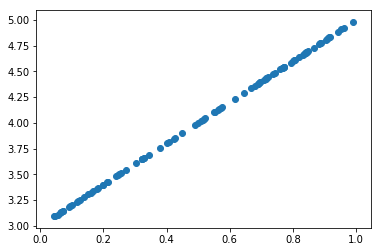

In [467]:
plt.scatter(dfn['x'], dfn['y'])
plt.show()

Text(0.5, 1.0, 'corr x $l=0.2*k-z+2*x+3$')

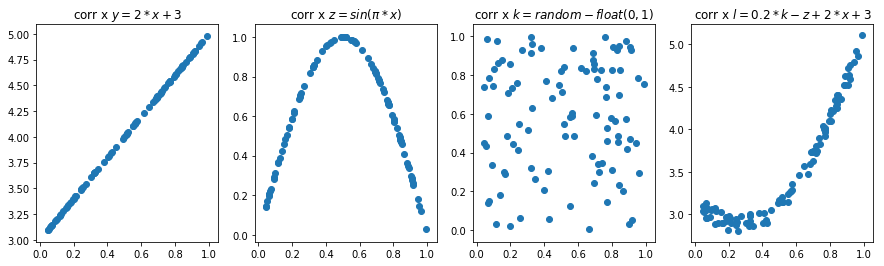

In [471]:
fig = plt.figure(figsize=(15,4))

ax1 = fig.add_subplot(141)
ax1.scatter(dfn['x'], dfn['y'])
ax1.set_title('corr x $y=2*x+3$')

ax2 = fig.add_subplot(142)
ax2.scatter(dfn['x'], dfn['z'])
ax2.set_title('corr x $z=sin(\pi*x)}$')#{x^2}$')

ax3 = fig.add_subplot(143)
ax3.scatter(dfn['x'], dfn['k'])
ax3.set_title('corr x $k=random-float (0,1)$')

ax4 = fig.add_subplot(144)
ax4.scatter(dfn['x'], dfn['l'])
ax4.set_title('corr x $l=0.2*k-z+2*x+3$')

In [472]:
corr = dfn.corr()
corr.head(len(dfn))

,x,y,z,k,l
x,1.000000,1.000000,0.030409,0.046820,0.902986
y,1.000000,1.000000,0.030409,0.046820,0.902986
z,0.030409,0.030409,1.000000,0.063486,-0.392779
k,0.046820,0.046820,0.063486,1.000000,0.104523
l,0.902986,0.902986,-0.392779,0.104523,1.000000


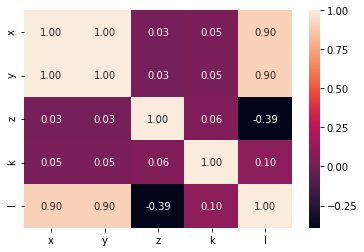

In [473]:
sns.heatmap(corr, annot=True, fmt=".2f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### https://www.mathsisfun.com/data/correlation.html

## Class exercise
* plot scatter plot of Age and Fare - is there a correlation ?
* calculate all pair correlation in Titanic data-frame
* plot heat map of Titanic data-frame

## Class exercise solution

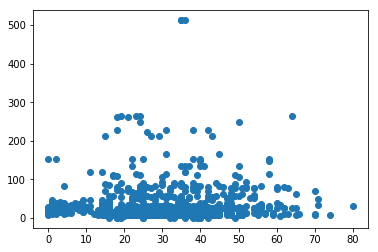

In [360]:
#plt.style.use('ggplot')

plt.scatter(df['Age'], df['Fare'])
plt.show()

In [361]:
corr = df.corr()
corr.head(len(df))

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,familys
Survived,1.000000,-0.338481,0.406609,0.543351,-0.052137,0.257307,0.106811,0.016639
Pclass,-0.338481,1.000000,-0.113828,-0.131900,-0.333932,-0.549500,0.045702,0.065997
Name,0.406609,-0.113828,1.000000,0.562511,-0.236339,0.141479,0.112476,0.318660
Sex,0.543351,-0.131900,0.562511,1.000000,-0.071564,0.182333,0.116569,0.200988
Age,-0.052137,-0.333932,-0.236339,-0.071564,1.000000,0.098535,-0.006890,-0.237724
Fare,0.257307,-0.549500,0.141479,0.182333,0.098535,1.000000,0.062142,0.217138
Embarked,0.106811,0.045702,0.112476,0.116569,-0.006890,0.062142,1.000000,-0.080281
familys,0.016639,0.065997,0.318660,0.200988,-0.237724,0.217138,-0.080281,1.000000


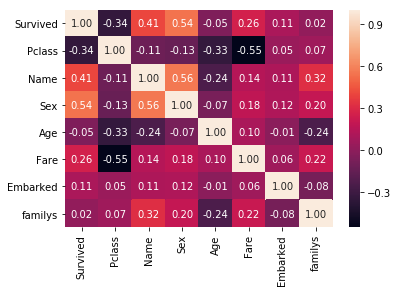

In [362]:
sns.heatmap(corr, annot=True, fmt=".2f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## pandas scatter matrix

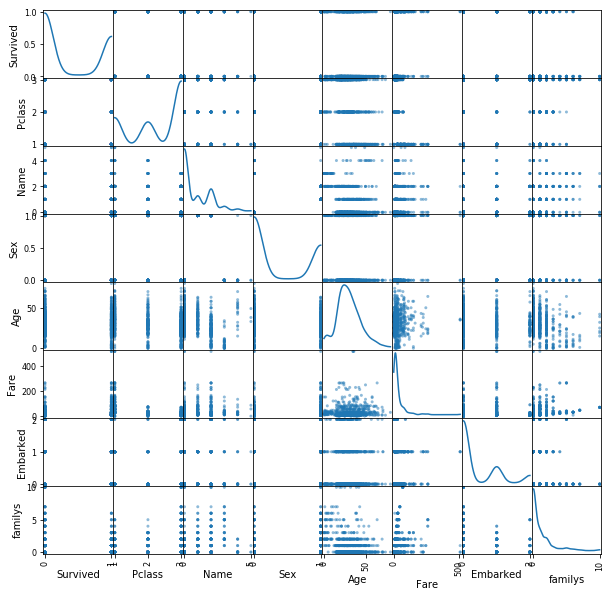

In [363]:
pd.plotting.scatter_matrix(df, figsize=(10, 10), diagonal='kde')
plt.show()

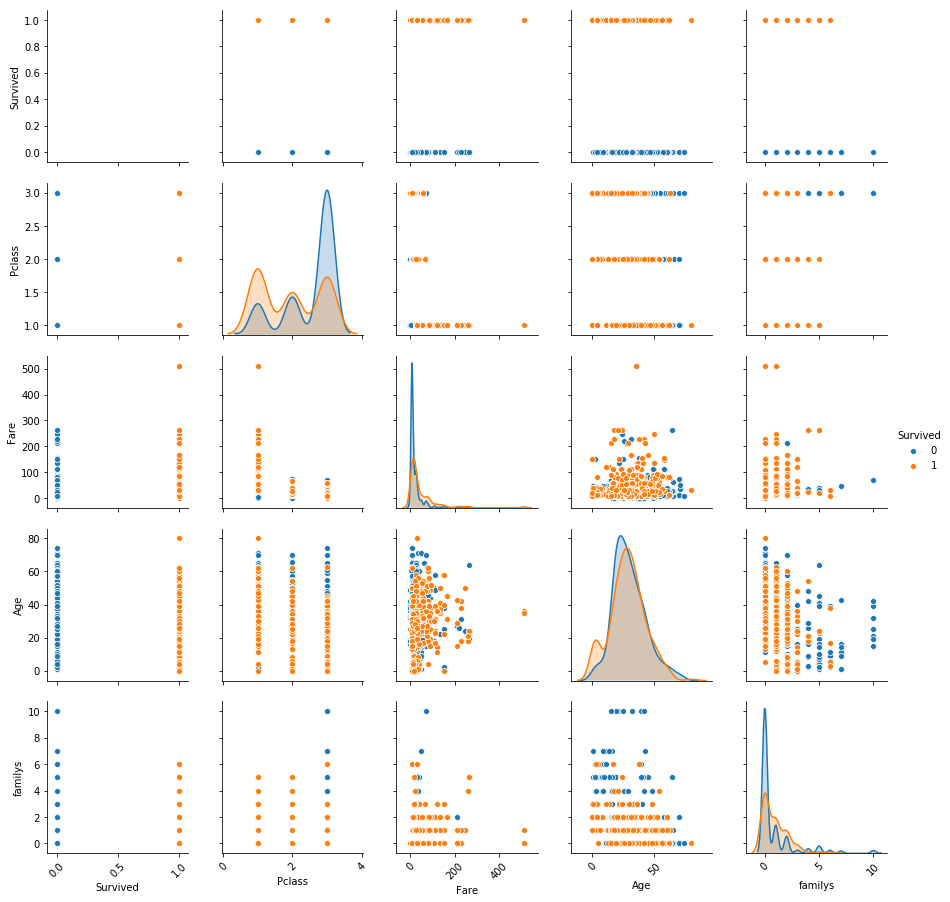

In [364]:
import seaborn as sns
g = sns.pairplot(df[["Survived", "Pclass", "Fare", "Age",  'familys']], 
                 hue="Survived", diag_kind="kde",diag_kws=dict(shade=True))
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

### General Statistics on numerical columns

In [365]:
df.describe()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,familys
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.790123,0.352413,29.552189,32.204208,0.361392,0.904602
std,0.486592,0.836071,1.077739,0.477990,13.545774,49.693429,0.635673,1.613459
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,21.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,28.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,2.000000,1.000000,38.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,5.000000,1.000000,80.000000,512.329200,2.000000,10.000000


### Customized aggregations
> apply by default run on all columns

In [366]:
df.median()

Survived     0.0000
Pclass       3.0000
Name         0.0000
Sex          0.0000
Age         28.0000
Fare        14.4542
Embarked     0.0000
familys      0.0000
dtype: float64

## Selecting row by index

In [367]:
print(df.index)

RangeIndex(start=0, stop=891, step=1)


In [368]:
df.head(4)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familys
0,0,3,0,0,22,A/5 21171,7.2500,0,1
1,1,1,1,1,38,PC 17599,71.2833,1,1
2,1,3,2,1,26,STON/O2. 3101282,7.9250,0,0
3,1,1,1,1,35,113803,53.1000,0,1


In [369]:
single_row = df.iloc[2, :]
print(type(single_row))
single_row

<class 'pandas.core.series.Series'>


Survived                   1
Pclass                     3
Name                       2
Sex                        1
Age                       26
Ticket      STON/O2. 3101282
Fare                   7.925
Embarked                   0
familys                    0
Name: 2, dtype: object

### Selecting few rows by index slicing

In [370]:
few_rows = df.iloc[2:6, :]
print(type(few_rows))
few_rows

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,familys
2,1,3,2,1,26,STON/O2. 3101282,7.9250,0,0
3,1,1,1,1,35,113803,53.1000,0,1
4,0,3,0,0,35,373450,8.0500,0,0
5,0,3,0,0,32,330877,8.4583,2,0


## Manage Index

### *set_index()* and *reset_index()*

<font size=3> **set_index()** allows to set the _DataFrame_ index (row labels) using one or more existing columns.

In [371]:
df.set_index('Name', inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,familys
Name,,,,,,,,
0,0,3,0,22,A/5 21171,7.2500,0,1
1,1,1,1,38,PC 17599,71.2833,1,1
2,1,3,1,26,STON/O2. 3101282,7.9250,0,0
1,1,1,1,35,113803,53.1000,0,1
0,0,3,0,35,373450,8.0500,0,0


<font size=3> **reset_index()** reset the index, turn the index values to a column and generate a sequence of integers as index

In [372]:
df.reset_index(inplace=True)
df.head()

,Name,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,familys
0,0,0,3,0,22,A/5 21171,7.2500,0,1
1,1,1,1,1,38,PC 17599,71.2833,1,1
2,2,1,3,1,26,STON/O2. 3101282,7.9250,0,0
3,1,1,1,1,35,113803,53.1000,0,1
4,0,0,3,0,35,373450,8.0500,0,0


In [373]:
df.isnull().sum()

Name        0
Survived    0
Pclass      0
Sex         0
Age         0
Ticket      0
Fare        0
Embarked    0
familys     0
dtype: int64

# The _GroupBy()_ class - SQL like featurem

_pandas_ supports many SQL-like featrues, including Boolean indexing (WHERE/HAVING), join() (JOIN), append() (UNION), sort_values() (ORDER BY) and many others. One of the most important features is the [_GroupBy_ class][1], which is a superset of  the GROUP BY command in SQL. It supports a neat **Split-Apply-Combine** mechanism which facilitates the application of (mostly) aggregative functions on sub-groups of the data.

The _GroupBy_ Split-Apply-Combine mechanism has a fairly simple 2-step call.

* The 1st step is to call _groupby(key)_. This will **split** the data by the specified _key_, and return a _GroupBy_ object.
* The 2nd step is to call some aggregative function on the object. This will **apply** the function to each split and **combine** the results back.

The returned value after the "combine" step is a new _DataFrame_, with the same rows as the original one, except for the _key_ column(s) which become the _index_. A detailed explanation of the above can be found [here][2].

[1]: http://pandas.pydata.org/pandas-docs/stable/api.html#groupby "The GroupBy class"
[2]: http://pandas.pydata.org/pandas-docs/stable/groupby.html "GroupBy explanation"
[3]: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby "DataFrame.GroupBy documentation"

Lets view data frame statistics, grouped by embarked

In [374]:
embarked = df.groupby('Embarked').mean()
embarked['Count'] = df['Embarked'].value_counts()
embarked.head()

,Name,Survived,Pclass,Sex,Age,Fare,familys,Count
Embarked,,,,,,,,
0,0.727554,0.339009,2.346749,0.317337,29.487616,27.243651,0.981424,646
1,0.863095,0.553571,1.886905,0.434524,30.363095,59.954144,0.750000,168
2,1.155844,0.389610,2.909091,0.467532,28.324675,13.276030,0.597403,77


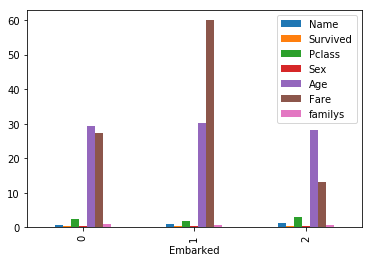

In [375]:
df.groupby('Embarked').mean().plot(kind='bar')

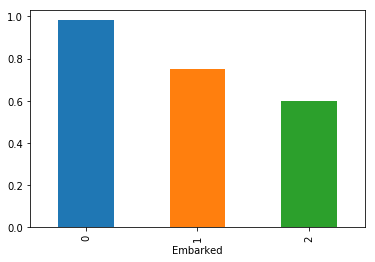

In [376]:
df.groupby('Embarked')['familys'].mean().plot(kind='bar')

## Class exercise - Tickets
Analyze clean and correct Ticket values.
1. transform Tickets to X if numeric, or pretfix if string. for example:
    * 'A/5 21171' $->$ 'A5'
    * 'STON/O2. 3101282' $->$ 'STONO2'
    * 113803 $->$ 'X'
2. check unique values are correct, and plot values count
3. group all values with count smaller then 20 together.
4. map into numeric categorical values.
5. plot correlations with Survived

### Hints for solution

In [377]:
print(df.Ticket[0])
print(df.Ticket[0].replace(".","").replace("/",""))
print(df.Ticket[0].replace(".","").replace("/","").strip().split(' ')[0])

A/5 21171
A5 21171
A5


## Solution

In [378]:
df.head()

,Name,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,familys
0,0,0,3,0,22,A/5 21171,7.2500,0,1
1,1,1,1,1,38,PC 17599,71.2833,1,1
2,2,1,3,1,26,STON/O2. 3101282,7.9250,0,0
3,1,1,1,1,35,113803,53.1000,0,1
4,0,0,3,0,35,373450,8.0500,0,0


In [379]:
df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [381]:
def Ticket_exctract(x):
        
    if not x.isdigit() :
        return x.replace(".","").replace("/","").strip().split(' ')[0] #Take prefix
    else:
        return 'X'
    
df['Ticket'] = df['Ticket'].apply(lambda x: Ticket_exctract(x))
df.head()

,Name,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,familys
0,0,0,3,0,22,A5,7.2500,0,1
1,1,1,1,1,38,PC,71.2833,1,1
2,2,1,3,1,26,STONO2,7.9250,0,0
3,1,1,1,1,35,X,53.1000,0,1
4,0,0,3,0,35,X,8.0500,0,0


In [382]:
print(df.Ticket.unique())

['A5' 'PC' 'STONO2' 'X' 'PP' 'CA' 'SCParis' 'SCA4' 'A4' 'SP' 'SOC' 'WC'
 'SOTONOQ' 'WEP' 'STONO' 'C' 'SCPARIS' 'SOP' 'Fa' 'LINE' 'FCC' 'SWPP'
 'SCOW' 'PPP' 'SC' 'SCAH' 'AS' 'SOPP' 'FC' 'SOTONO2' 'CASOTON']


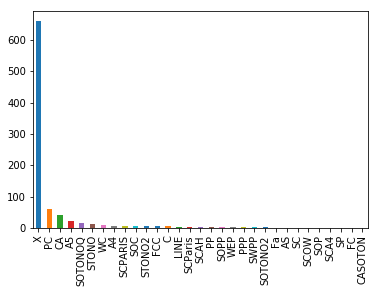

In [383]:
df.Ticket.value_counts().plot(kind='bar')

In [384]:
def Ticket_transform(x, Ticket_value_count):
        
    if (Ticket_value_count[x] < 20):
        return 'O'
    else:
        return x

Ticket_value_count = df["Ticket"].value_counts()
df['Ticket'] = df['Ticket'].apply(lambda x: Ticket_transform(x, Ticket_value_count))
df.head()

,Name,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,familys
0,0,0,3,0,22,A5,7.2500,0,1
1,1,1,1,1,38,PC,71.2833,1,1
2,2,1,3,1,26,O,7.9250,0,0
3,1,1,1,1,35,X,53.1000,0,1
4,0,0,3,0,35,X,8.0500,0,0


Text(0, 0.5, 'Survival Rate')

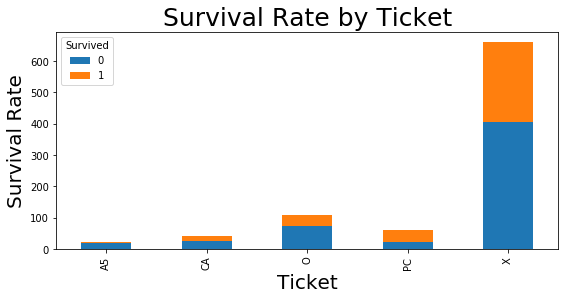

In [385]:
Ticket_Survived = pd.crosstab(df['Ticket'], df['Survived'])

Ticket_Survived.plot(kind='bar', 
                  stacked=True, 
                  fontsize=10, figsize=(9,4))
plt.title('Survival Rate by Ticket', fontsize=25)
plt.xlabel('Ticket',fontsize=20)
plt.ylabel('Survival Rate', fontsize=20)

In [386]:
Ticket_Survived = pd.crosstab(df['Ticket'], df['Survived'], 
                              normalize='index')

Text(0, 0.5, 'Survival Rate')

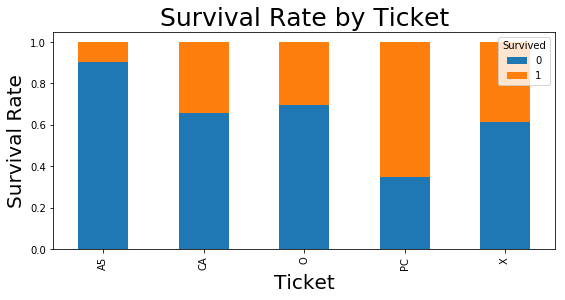

In [387]:
Ticket_Survived.plot(kind='bar', 
                  stacked=True, 
                  fontsize=10, figsize=(9,4))
plt.title('Survival Rate by Ticket', fontsize=25)
plt.xlabel('Ticket',fontsize=20)
plt.ylabel('Survival Rate', fontsize=20)